In [1]:
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
files=['human.csv','machine.csv']

author={}
columns={}
cols=[]

for file in files:
    f=open('20_minuten/'+file,"r")
    k=f.read()
    columns[file]=k.split("\n")[0].split("\t")[1:]  # cols ohne file name
    cols+=columns[file]
    author[file]=k.split("\n")[1:] # pro author alle files (mit file name als 1. Arg)
   
# alle stylo features
allcols=set(cols)

all=allcols
for c in columns.values():
    all=set(all).intersection(c)

allcols=list(all)
len(allcols)

117

In [3]:
columns

{'human.csv': ['n_sentences',
  'n_tokens',
  'tokens_per_sent',
  'char_per_tok',
  'ttr_lemma_chunks_100',
  'ttr_lemma_chunks_200',
  'ttr_form_chunks_100',
  'ttr_form_chunks_200',
  'upos_dist_ADJ',
  'upos_dist_ADP',
  'upos_dist_ADV',
  'upos_dist_AUX',
  'upos_dist_CCONJ',
  'upos_dist_DET',
  'upos_dist_NOUN',
  'upos_dist_NUM',
  'upos_dist_PART',
  'upos_dist_PRON',
  'upos_dist_PROPN',
  'upos_dist_PUNCT',
  'upos_dist_SCONJ',
  'upos_dist_SYM',
  'upos_dist_VERB',
  'upos_dist_X',
  'lexical_density',
  'verbs_tense_dist_Past',
  'verbs_tense_dist_Pres',
  'verbs_mood_dist_Imp',
  'verbs_mood_dist_Ind',
  'verbs_mood_dist_Sub',
  'verbs_form_dist_Fin',
  'verbs_form_dist_Inf',
  'verbs_form_dist_Part',
  'verbs_num_pers_dist_Plur+1',
  'verbs_num_pers_dist_Plur+3',
  'verbs_num_pers_dist_Sing+',
  'verbs_num_pers_dist_Sing+1',
  'verbs_num_pers_dist_Sing+2',
  'verbs_num_pers_dist_Sing+3',
  'aux_tense_dist_Past',
  'aux_tense_dist_Pres',
  'aux_mood_dist_Ind',
  'aux_mood

In [4]:
X,y=[],[]
for single_author in columns:
    acol=columns[single_author]        # die cols eines bestimmten Authors
    for doc in author[single_author]:
        doc=doc.split("\t")[1:]        # alles ohne file name
        author_vect=[]
        for c in allcols:
            if c in acol:
                author_vect.append(float(doc[acol.index(c)]))
            else: # gibt es nicht bei schnitt
                author_vect.append(0)
        X.append(author_vect)
        y.append(single_author)

In [5]:
s=StandardScaler().fit(X)
X=s.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [6]:
model=LogisticRegression(max_iter=1000, random_state=42)

model.fit(X_train, y_train)

y_pred=model.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

   human.csv       1.00      0.90      0.95        29
 machine.csv       0.88      1.00      0.93        21

    accuracy                           0.94        50
   macro avg       0.94      0.95      0.94        50
weighted avg       0.95      0.94      0.94        50



In [7]:
model.predict([X_test[0]]),y_test[0]

(array(['machine.csv'], dtype='<U11'), 'machine.csv')

In [8]:
explainer = shap.Explainer(
    model, X_train, feature_names=allcols
)
shap_values = explainer(X_test)

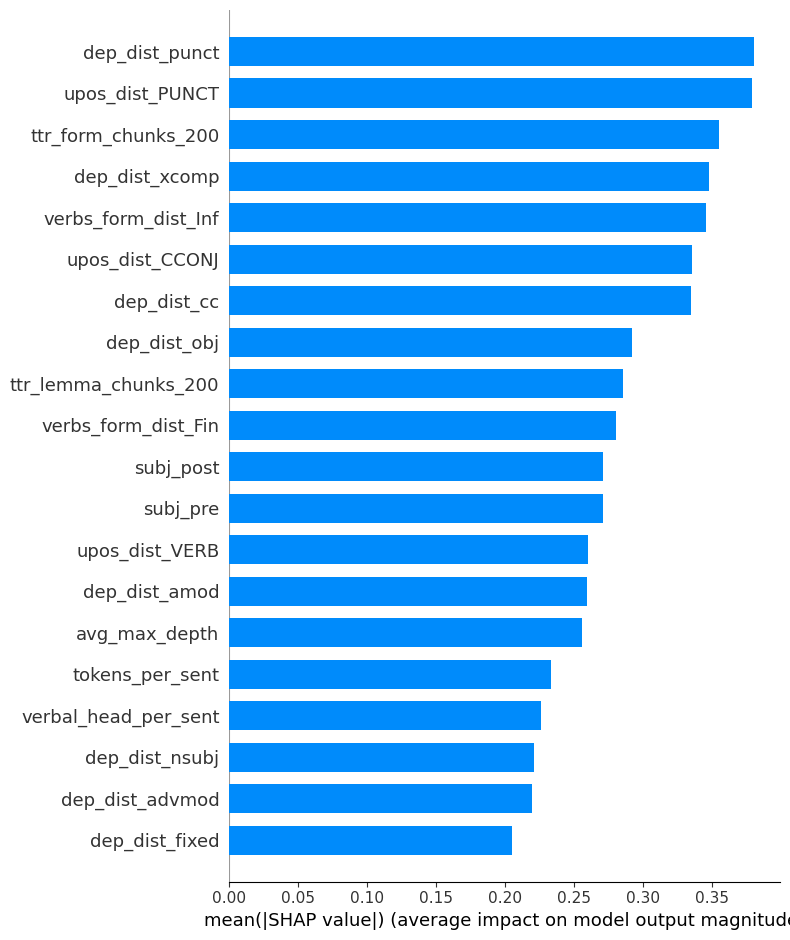

In [9]:
shap.summary_plot(shap_values, X, plot_type="bar")

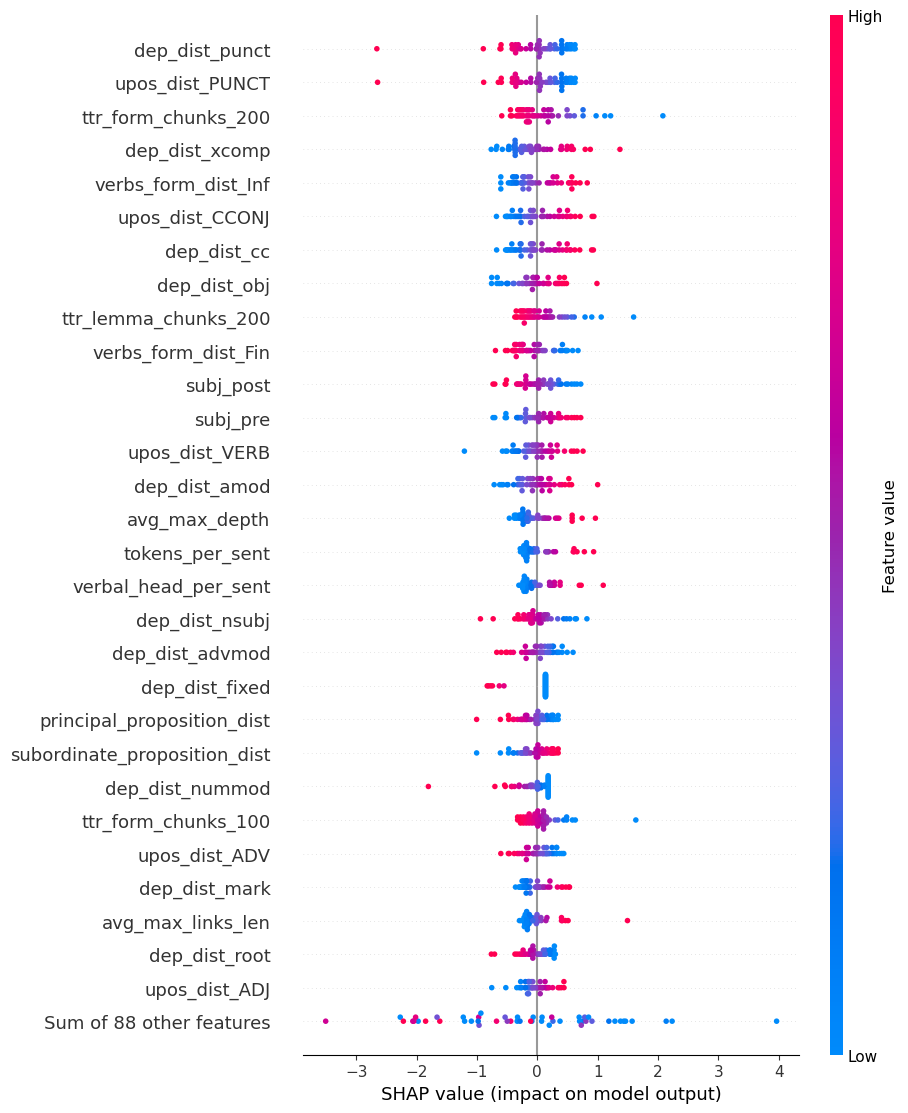

In [10]:
shap.plots.beeswarm(shap_values, max_display=30)

In [11]:
X_adult, y_adult = shap.datasets.adult()

import sklearn

model_adult = sklearn.linear_model.LogisticRegression(max_iter=10000)
model_adult.fit(X_adult, y_adult)


def model_adult_proba(x):
    return model_adult.predict_proba(x)[:, 1]


def model_adult_log_odds(x):
    p = model_adult.predict_log_proba(x)
    return p[:, 1] - p[:, 0]



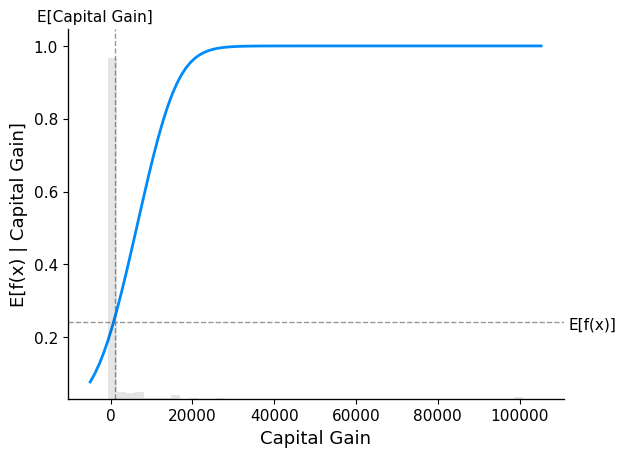

In [12]:
# make a standard partial dependence plot
sample_ind = 18
fig, ax = shap.partial_dependence_plot(
    "Capital Gain",
    model_adult_proba,
    X_adult,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
)

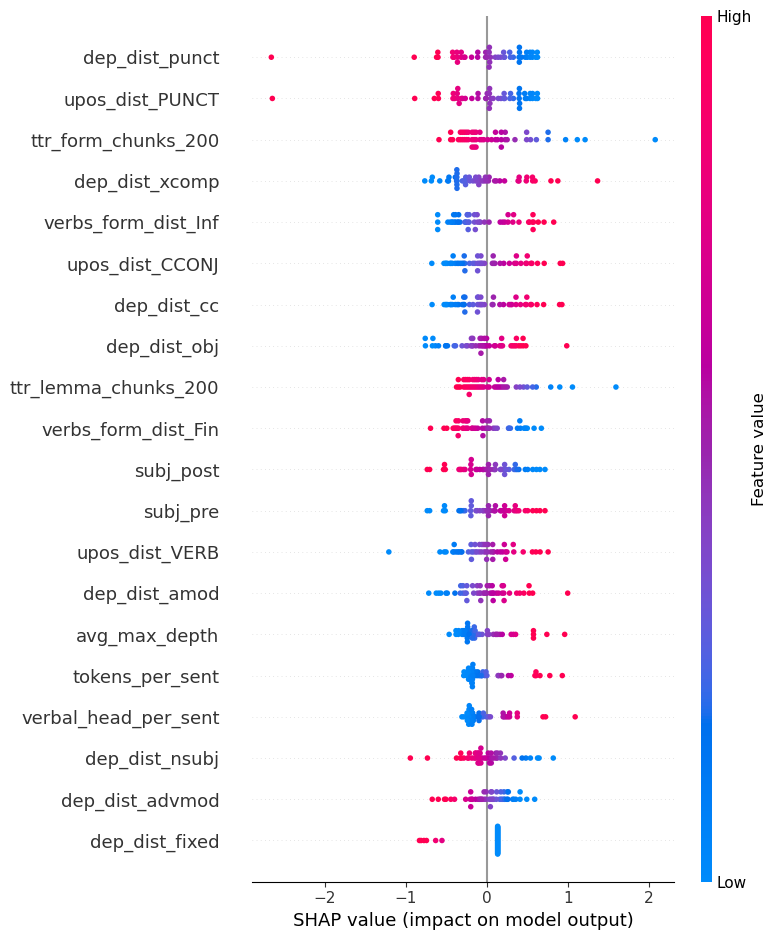

In [13]:
shap.summary_plot(shap_values, X_test)

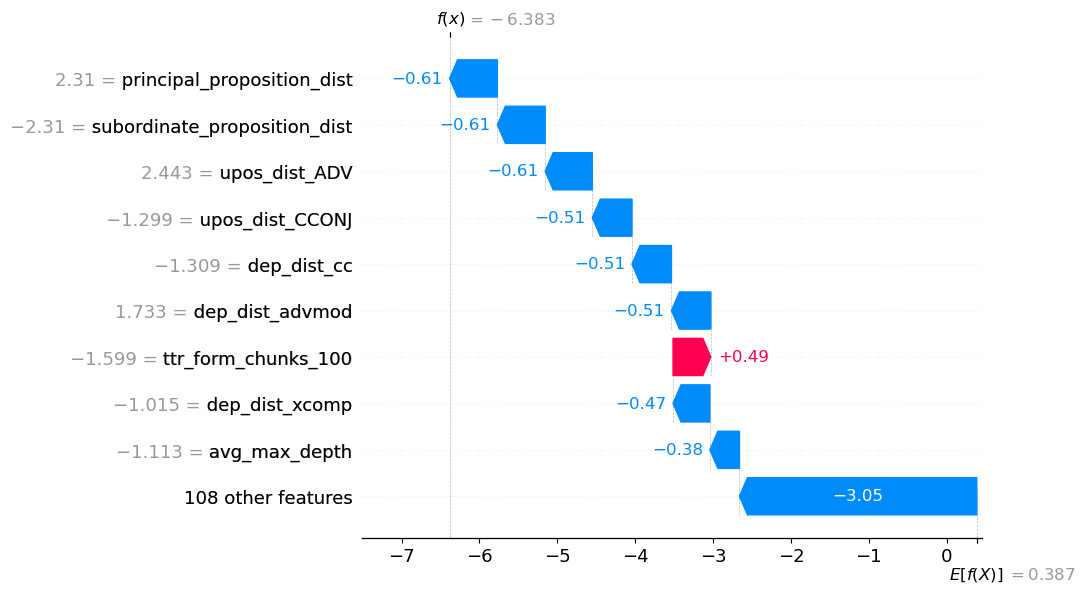

(None, 'human.csv')

In [14]:
shap.plots.waterfall(shap_values[1]),y_test[1]

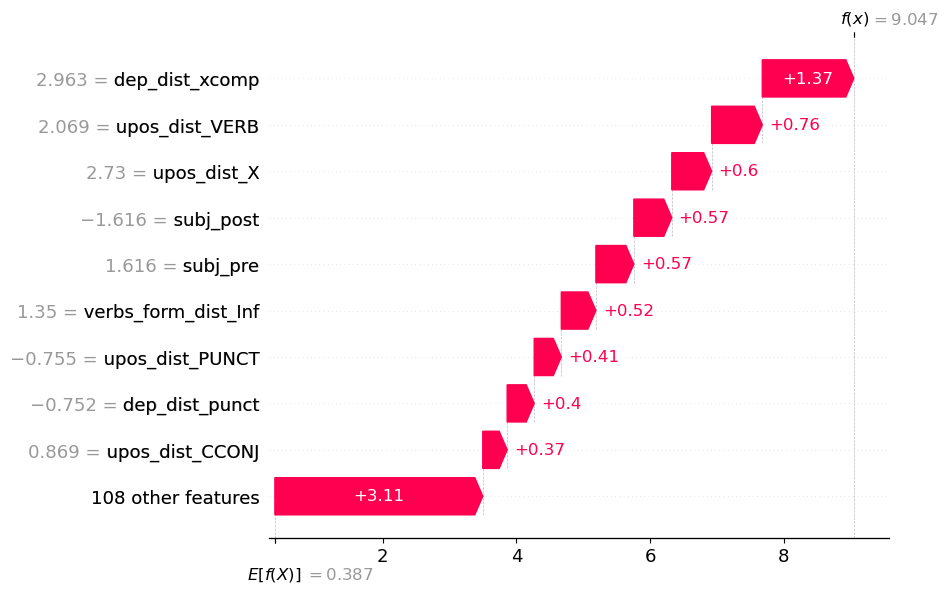

(None, 'machine.csv')

In [15]:
shap.plots.waterfall(shap_values[0]),y_test[0]

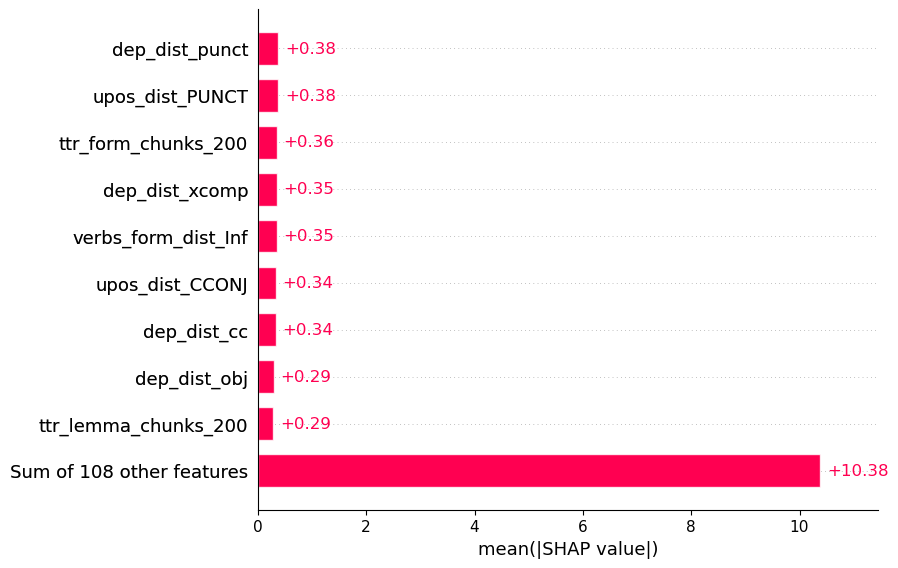

In [16]:
shap.plots.bar(shap_values.abs.mean(0))

In [17]:
#shap.force_plot(explainer.expected_value, shap_values[10,:], X_test[0,:])
X_test.shape,shap_values.shape

((50, 117), (50, 117))

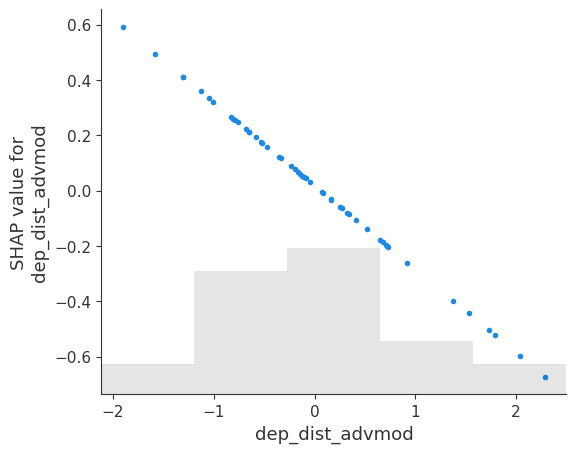

In [18]:
shap.plots.scatter(shap_values[:, 'dep_dist_advmod',0])

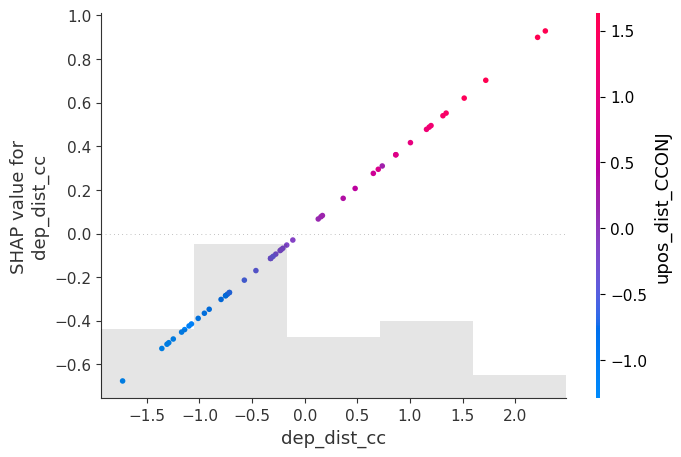

In [19]:

shap.plots.scatter(shap_values[:, 'dep_dist_cc',0], color=shap_values[:,:,0])

In [20]:
[author['human.csv'][i].split("\t")[allcols.index('dep_dist_advmod')] for i in range(1,50)]

['6.944444444444445',
 '9.838998211091234',
 '4.066543438077634',
 '7.269155206286837',
 '8.778625954198473',
 '6.18374558303887',
 '3.5650623885918002',
 '9.722222222222221',
 '4.990403071017274',
 '7.0085470085470085',
 '8.187134502923977',
 '1.5847860538827259',
 '5.565529622980251',
 '9.003831417624522',
 '4.444444444444445',
 '11.764705882352942',
 '6.359300476947536',
 '6.628787878787879',
 '9.342230695900858',
 '10.820244328097731',
 '11.944444444444445',
 '6.187290969899665',
 '5.698529411764706',
 '9.288537549407115',
 '4.107142857142857',
 '7.5',
 '5.909797822706065',
 '4.361873990306947',
 '8.082706766917294',
 '3.51493848857645',
 '7.746478873239437',
 '2.6455026455026456',
 '7.5',
 '10.23339317773788',
 '5.602240896358543',
 '7.985480943738657',
 '10.805500982318271',
 '10.476190476190476',
 '5.95903165735568',
 '4.954128440366972',
 '4.597701149425287',
 '2.5641025641025643',
 '5.873015873015873',
 '6.58578856152513',
 '6.168224299065421',
 '8.54368932038835',
 '7.6256499

In [21]:
# author: Lucien Wirz

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

import sklearn
import os
# Load speeches and labels from dataset
def load_data(dataset_path):
    speeches = []
    labels = []
    for author_id, author_folder in enumerate(os.listdir(dataset_path)):
        author_path = os.path.join(dataset_path, author_folder)
        for file_name in os.listdir(author_path):
            file_path = os.path.join(author_path, file_name)
            with open(file_path, "r", encoding="utf-8") as infile:
                text = infile.read()
                speeches.append(text)
                labels.append(author_id)
    return speeches, labels


texts, y = load_data('data/')

corpus_train, corpus_test, y_train, y_test = train_test_split(
    texts, y, test_size=0.2, random_state=7
)

vectorizer = TfidfVectorizer(min_df=10)
X_train = vectorizer.fit_transform(
    corpus_train
).toarray()  
X_test = vectorizer.transform(corpus_test).toarray()


model = sklearn.linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X_train, y_train)

print(classification_report(y_test, model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94        17
           1       1.00      0.91      0.95        23

    accuracy                           0.95        40
   macro avg       0.95      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40



In [22]:
explainer = shap.Explainer(
    model, X_train,feature_names=vectorizer.get_feature_names_out()
)
shap_values = explainer(X_test)

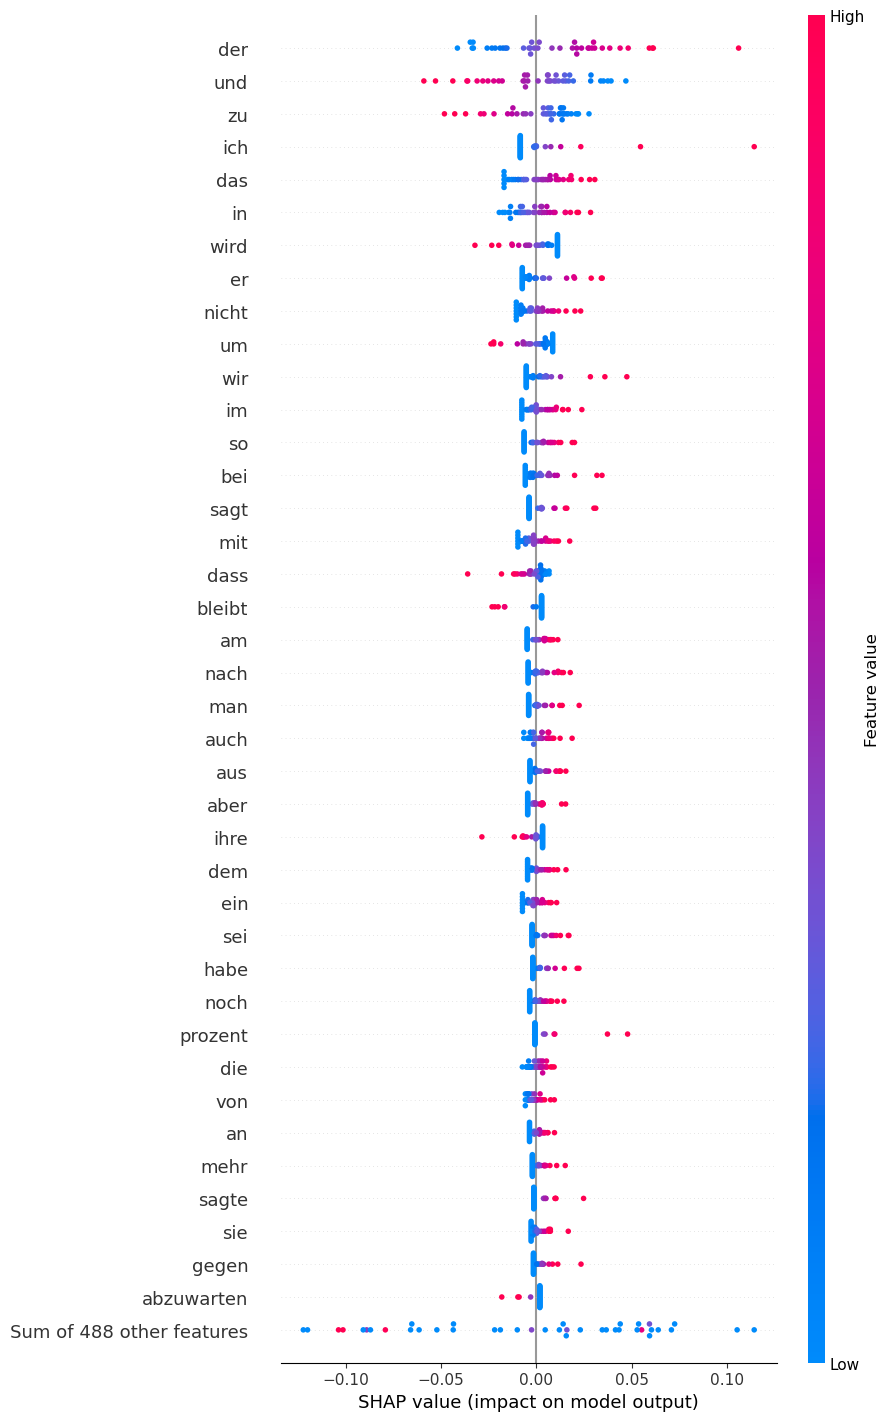

In [23]:
shap.plots.beeswarm(shap_values, max_display=40)


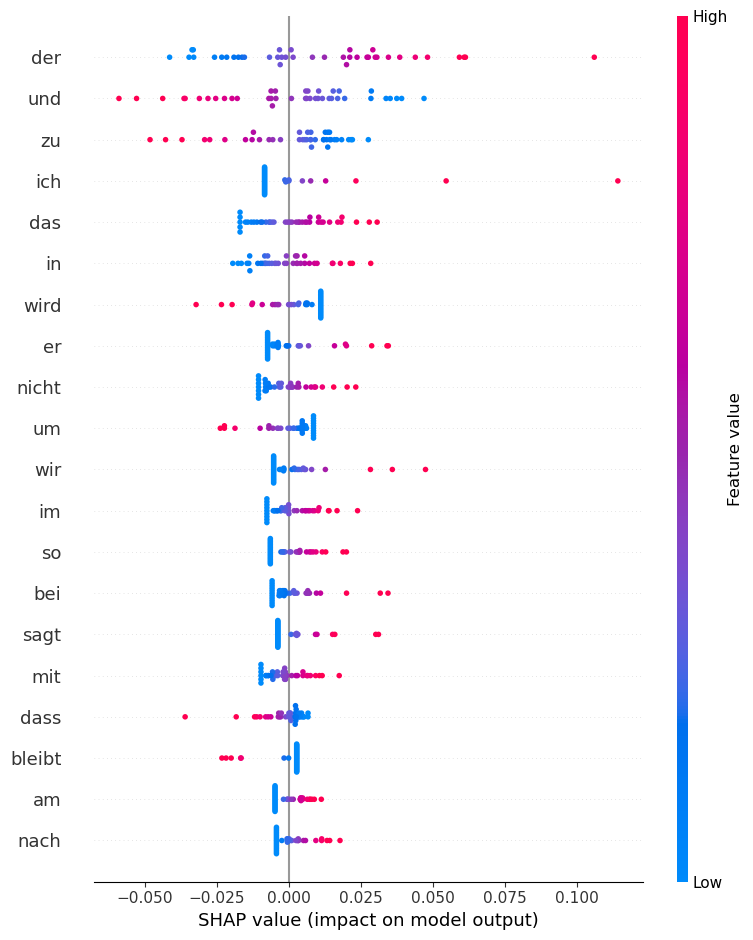

In [24]:
shap.summary_plot(shap_values, X_test)